In [2]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd

# Load data
data = pd.read_csv('./dataset/processed_text.csv', encoding='utf-8')  # Replace with your dataset path

# Chia dữ liệu thành tập train và test
X_train, X_test, y_train, y_test = train_test_split(data['text'].astype(str).values, data['label'], test_size=0.2, random_state=42)

vectorizer = CountVectorizer()

# Fit and transform X_train
X_train_vectorized = vectorizer.fit_transform(X_train)
# Transform X_test
X_test_vectorized = vectorizer.transform(X_test)

model = MultinomialNB()
model.fit(X_train_vectorized, y_train)

# Dự đoán trên tập test
y_pred = model.predict(X_test_vectorized) # Predict using test data

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')

Accuracy: 0.8667532548823235
Confusion Matrix:
[[44813  5067]
 [ 3448 10576]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.90      0.91     49880
           1       0.68      0.75      0.71     14024

    accuracy                           0.87     63904
   macro avg       0.80      0.83      0.81     63904
weighted avg       0.87      0.87      0.87     63904



In [1]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd

# Load data
data = pd.read_csv('./dataset/processed_text.csv', encoding='utf-8')  # Replace with your dataset path

# Chia dữ liệu thành tập train và test
X_train, X_test, y_train, y_test = train_test_split(data['text'].astype(str).values, data['label'], test_size=0.2, random_state=42)

vectorizer = CountVectorizer()

# Fit and transform X_train
X_train_vectorized = vectorizer.fit_transform(X_train)
# Transform X_test
X_test_vectorized = vectorizer.transform(X_test)

model = MultinomialNB()
model.fit(X_train_vectorized, y_train)

# Dự đoán trên tập test
y_pred = model.predict(X_test_vectorized) # Predict using test data

In [2]:
# # Áp dụng SMOTE để xử lý mất cân bằng dữ liệu
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_vectorized, y_train)

# Kiểm tra phân phối sau khi áp dụng SMOTE
print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", pd.Series(y_train_smote).value_counts())

Before SMOTE: label
0    199351
1     56265
Name: count, dtype: int64
After SMOTE: label
1    199351
0    199351
Name: count, dtype: int64


In [3]:
model = MultinomialNB()
model.fit(X_train_smote, y_train_smote)
# Dự đoán trên tập test
y_pred = model.predict(X_test_vectorized) # Predict using test data

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')

Accuracy: 0.8556115423134703
Confusion Matrix:
[[43687  6193]
 [ 3034 10990]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.88      0.90     49880
           1       0.64      0.78      0.70     14024

    accuracy                           0.86     63904
   macro avg       0.79      0.83      0.80     63904
weighted avg       0.87      0.86      0.86     63904



In [3]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd

# Load data
data = pd.read_csv('./dataset/processed_text.csv', encoding='utf-8')  # Replace with your dataset path

# Chia dữ liệu thành tập train và test
X_train, X_test, y_train, y_test = train_test_split(data['text'].astype(str).values, data['label'], test_size=0.2, random_state=42)

from underthesea import text_normalize, word_tokenize

X_train_tokenized = [word_tokenize(sentence, format="text") for sentence in X_train]
X_test_tokenized = [word_tokenize(sentence, format="text") for sentence in X_test]

print(X_train_tokenized[0])

mình mua tai nghe về dùng được mấy ngày là bị lỗi bên không nghe được gọi tiki nhờ đổi bảo_hành thì gần cả tuần sau mới đến lấy thông_báo bảo_hành trong ngày tổng thời_gian đến lấy hàng và đổi bảo_hành là tháng mình nghĩ tiki nên xem_lại cách bảo_hành sản_phẩm của tiki thời_gian quá dài mình cảm_thấy rất chán và nản với cách làm_việc như_vậy


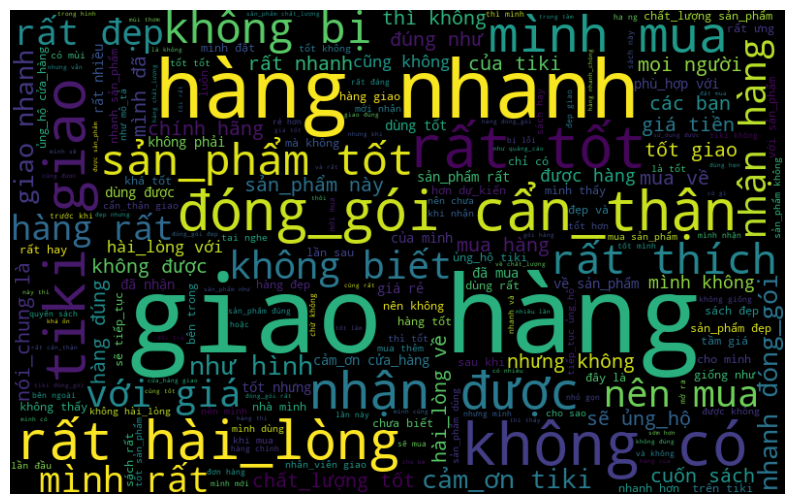

In [5]:
import matplotlib.pyplot as plt
all_words = ' '.join([text for text in X_train_tokenized])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()


In [13]:
# Vectorize the tokenized text data
X_train_vectorized = vectorizer.fit_transform(X_train_tokenized)
X_test_vectorized = vectorizer.transform(X_test_tokenized)

model = MultinomialNB()
model.fit(X_train_vectorized, y_train)
# Dự đoán trên tập test
y_pred = model.predict(X_test_vectorized) # Predict using test data

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')

Accuracy: 0.8777697796695042
Confusion Matrix:
[[45919  3961]
 [ 3850 10174]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.92      0.92     49880
           1       0.72      0.73      0.72     14024

    accuracy                           0.88     63904
   macro avg       0.82      0.82      0.82     63904
weighted avg       0.88      0.88      0.88     63904



In [14]:
label_0_data = data[data['label'] == 0]
print(label_0_data)

         index                                               text  label
0            0  tiki giao hàng nhanh đóng gói cần thận nhân vi...      0
2            2  ổn chất lượng sẽ theo thời gian trả lời bây gi...      0
3            3  sản phẩm dùng tốt chất lượng đường hàn đẹp rất...      0
4            4  mình rất hài lòng với sản phẩm này và dịch vụ ...      0
6            6   giao hàng rất nhanh hàng chính hãng được đập hộp      0
...        ...                                                ...    ...
319510  321598  giao hàng nhanh chóng hàng mới nguyên vẹn chưa...      0
319511  321599  sản phẩm tốt chính xác như mô tả bé sử dụng rấ...      0
319513  321601          sa  phâ  râ  đe  râ  ưng  tiê  tu   ng hô      0
319518  321607  sách hay thật và đọc cuốn thật như những nhận ...      0
319519  321608  dây dày dặn chắc chắn đóng gói đẹp mình  hn đặ...      0

[249231 rows x 3 columns]


In [16]:
label_0_data = [word_tokenize(sentence, format="text") for sentence in label_0_data['text'].astype(str).values]
print(label_0_data[0])

tiki giao hàng nhanh đóng_gói cần thận nhân_viên giao hàng thân_thiện


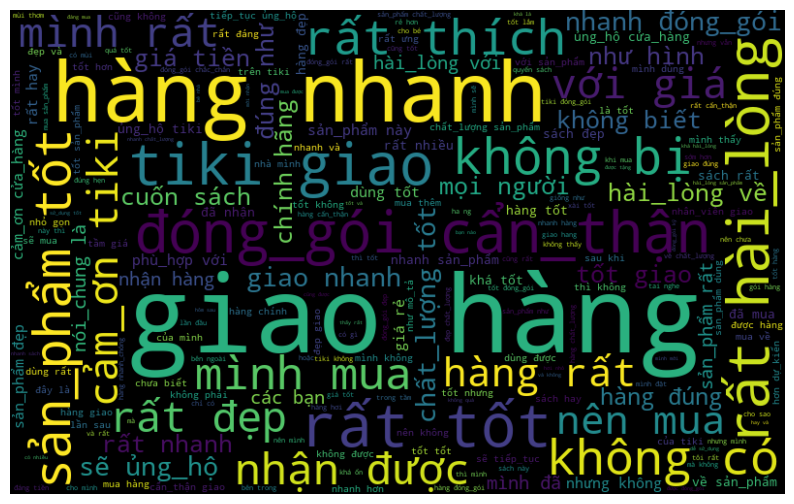

In [17]:
import matplotlib.pyplot as plt
all_words = ' '.join([text for text in label_0_data])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [9]:
label_1_data = data[data['label'] == 1]
print(label_1_data)


         index                                               text  label
1            1  tôi mua nó để chơi game để không làm phiền ngư...      1
5            5  lần trước mua ăn rất ngon lần này oder hủ ăn q...      1
9            9  mình mua đơn hàng quyển và quyển này bị chia đ...      1
11          11  nhìn tổng quan thì tốt nhưng chất liệu xấu quá...      1
17          17  đóng gói khá chắn chắn trong hộp được tặng kèm...      1
...        ...                                                ...    ...
319512  321600  cửa hàng lấy màu không chuẩn minh chon trắng t...      1
319514  321602  mình xay cháo cho con ăn vẫn còn lơnj cợn phải...      1
319515  321603  không nhận được em wifi chỉ kết nối qua cáp mo...      1
319516  321605  giao hàng tre ngay hàng tốt giá rẻ cảm ơn cty ...      1
319517  321606  san pham mua ve vua mong lai co mot cai thao l...      1

[70289 rows x 3 columns]


In [11]:
label_1_data = [word_tokenize(sentence, format="text") for sentence in label_1_data['text'].astype(str).values]
print(label_1_data[0])

tôi mua nó để chơi game để không làm_phiền người xung_quanh mà một_khi mở mic lên là rồi không nghe tiếng gì nữa


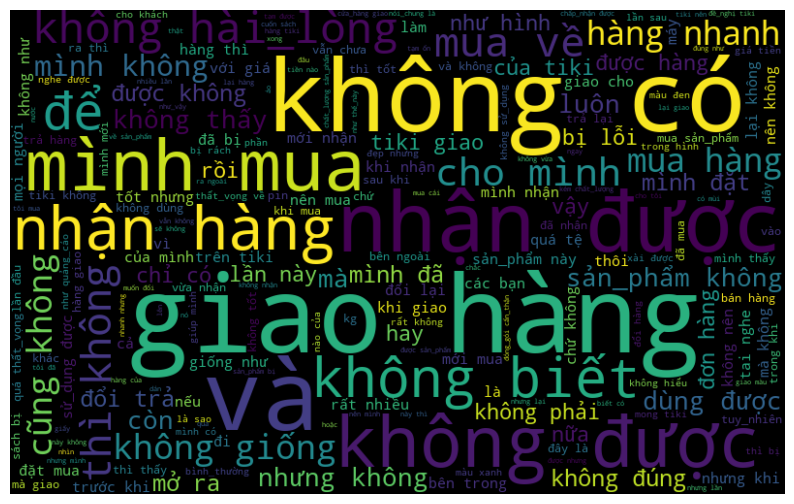

In [12]:
import matplotlib.pyplot as plt
all_words = ' '.join([text for text in label_1_data])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Load data
data = pd.read_csv('./dataset/processed_text.csv', encoding='utf-8')  # Replace with your dataset path

# Chia dữ liệu thành tập train và test
tfidf_vectorizer = TfidfVectorizer()
tfidf_vectorizer.fit(data['text'].astype(str).values)
X = tfidf_vectorizer.transform(data['text'].astype(str).values)
y = data['label'].values

# Chia dữ liệu thành tập train và test
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.2, random_state=42)
MNB = MultinomialNB()
MNB.fit(X_train, y_train)
pred = MNB.predict(X_val)

print("Accuracy: ", accuracy_score(y_val, pred))
print(classification_report(y_val, pred))
print(confusion_matrix(y_val, pred))


Accuracy:  0.7980095142714071
              precision    recall  f1-score   support

           0       0.80      1.00      0.89    199297
           1       0.91      0.09      0.17     56319

    accuracy                           0.80    255616
   macro avg       0.85      0.54      0.53    255616
weighted avg       0.82      0.80      0.73    255616

[[198814    483]
 [ 51149   5170]]
